In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from lane_detection import *
from lane_following import *

In [2]:
img = cv2.imread("/home/keshav/cv-intro/media/pool.png")

[[[3052 1178 3726 1309]]

 [[1044 2066 1405 1465]]

 [[1006 2132 1393 1488]]

 [[1066 2026 1433 1415]]

 [[1427 2133 1553 1587]]]


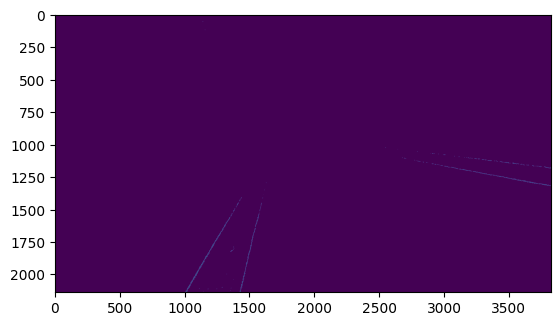

In [3]:
lines = detect_lines(img, 49, 50, 3, 500, 40)
print(lines)

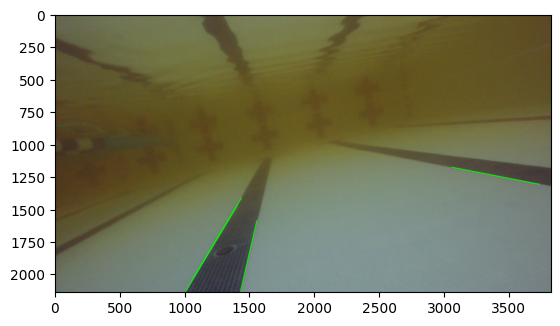

In [4]:
plt.imshow(draw_lines(img, lines))

In [5]:
get_slopes_intercepts(lines)

([0.1943620178041543,
  -1.664819944598338,
  -1.6640826873385013,
  -1.664850136239782,
  -4.333333333333333],
 [8104.427480916031,
  987.5374376039933,
  989.1739130434783,
  985.5122749590835,
  1420.7692307692307])

In [6]:
lanes = detect_lanes(lines)
print(lanes)

[[[987.5374376039933, 2160, 1691.0519031141869, 988.7750865051903], [1420.7692307692307, 2160, 1691.0519031141869, 988.7750865051903]], [[989.1739130434783, 2160, 1689.837366892546, 994.0380767989673], [1420.7692307692307, 2160, 1689.837366892546, 994.0380767989673]], [[985.5122749590835, 2160, 1692.3233492171546, 983.2654867256635], [1420.7692307692307, 2160, 1692.3233492171546, 983.2654867256635]]]


3
___
[[987.5374376039933, 2160, 1691.0519031141869, 988.7750865051903], [1420.7692307692307, 2160, 1691.0519031141869, 988.7750865051903]]
___
[[987.5374376039933, 2160, 1691.0519031141869, 988.7750865051903], [1420.7692307692307, 2160, 1691.0519031141869, 988.7750865051903]]
___
[[989.1739130434783, 2160, 1689.837366892546, 994.0380767989673], [1420.7692307692307, 2160, 1689.837366892546, 994.0380767989673]]
___
[[989.1739130434783, 2160, 1689.837366892546, 994.0380767989673], [1420.7692307692307, 2160, 1689.837366892546, 994.0380767989673]]
___
[[985.5122749590835, 2160, 1692.3233492171546, 983.2654867256635], [1420.7692307692307, 2160, 1692.3233492171546, 983.2654867256635]]
___
[[985.5122749590835, 2160, 1692.3233492171546, 983.2654867256635], [1420.7692307692307, 2160, 1692.3233492171546, 983.2654867256635]]


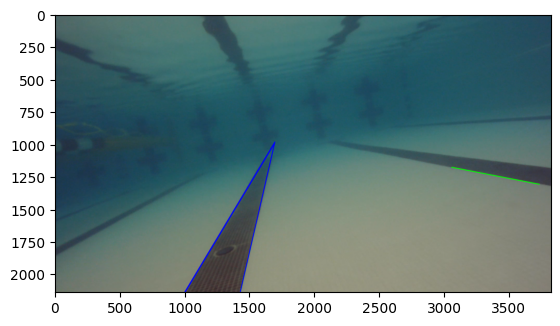

In [7]:
print(len(lanes))
lane_img = draw_lanes(img, lanes)
plt.imshow(cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB))
plt.show()

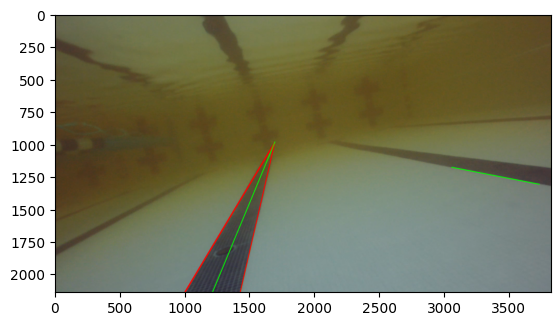

In [8]:
center_lane = get_center_lane(lanes)
x = center_lane[0][2]
y = center_lane[0][3]
intercept, slope = get_lane_center(get_center_lane(lanes))

cv2.line(img, (int(intercept), 2160), (int(x),int(y)), (0,255,0), 5)
plt.imshow(img)

In [9]:
video = cv2.VideoCapture('/home/keshav/cv-intro/media/AUV_Vid1.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'output_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret = True
while ret:
    ret, frame = video.read()
    lines = detect_lines(frame, 50, 90, 3,150,10)
    print(lines)
        #try: 
        #    frame = draw_lines(frame, lines,(0, 255, 0))
        #    print ("tried to draw lines")
        #except :
       #     pass
    try:
        lanes = detect_lanes(lines)
        # print ("tried to detect lanes")
        closest_lane = get_center_lane(lanes)
        frame = draw_lane(frame, closest_lane, (255, 0, 0))
        frame = draw_lines(frame, lines,(0, 255, 0))
        avg_x_intercept, avg_slope = get_lane_center(closest_lane)
        x = closest_lane[0][2]
        y = closest_lane[0][3]
        cv2.line(frame, (int(avg_x_intercept), 1080), (int(x), int(y)), (0,0,255), 3)
        print(recommend_direction(avg_x_intercept, avg_slope))
        plt.imshow(frame)
        output_video.write(frame)
    except:
        pass
        
        
    # recommend_direction(avg_x_intercept, avg_slope)
    

video.release()
output_video.release()

[[[1365  789 1544  865]]

 [[1687  925 1891 1011]]

 [[1725  887 1898  950]]

 [[1288  757 1704  933]]

 [[ 843  849  959 1077]]

 [[1621  848 1803  914]]]
go left + turn right
[[[1384  797 1745  950]]

 [[1541  819 1883  944]]

 [[1641  905 1841  990]]

 [[ 843  848  959 1077]]

 [[ 855  870  961 1078]]

 [[1739  946 1918 1022]]]
go left + turn right
[[[1595  886 1839  989]]

 [[1373  793 1621  898]]

 [[1532  815 1804  914]]

 [[1619  848 1886  945]]

 [[ 838  837  959 1075]]

 [[1714  935 1910 1018]]]
go left + turn right
[[[1618  847 1897  948]]

 [[1687  924 1866 1000]]

 [[1393  801 1734  945]]

 [[ 878  917  960 1079]]]
[[[1308  764 1714  936]]

 [[1531  814 1807  915]]

 [[1624  897 1812  977]]

 [[ 839  838  961 1078]]

 [[ 842  847  947 1052]]]
go left + turn right
[[[1543  818 1897  947]]

 [[1354  783 1724  940]]

 [[ 816  793  960 1076]]

 [[1710  932 1866  998]]

 [[ 825  812  933 1024]]]
[[[1566  825 1901  947]]

 [[1520  853 1713  934]]

 [[ 823  806  960 1075]]

 [[167

/home/keshav/cv-intro/lane_detection.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2 - y1) / (x2 - x1)
/home/keshav/cv-intro/lane_detection.py:72: RuntimeWarning: invalid value encountered in scalar divide
  x = (slopes[i] * intercepts[i] - slopes[j] * intercepts[j]) / (


[[[ 864  461  999  877]]

 [[ 980  824 1063 1078]]

 [[1762  591 1918  648]]

 [[1701  568 1910  644]]]
[[[ 901  568 1046 1013]]

 [[ 970  784 1026  958]]

 [[1725  567 1917  637]]]
[[[939 675 996 862]]

 [[786 999 789 834]]

 [[887 509 970 779]]]
go forward + turn left
[[[ 781 1079  784  901]]

 [[ 887  502  966  759]]

 [[ 934  651 1005  884]]]
go forward + turn left
[[[ 869  434 1064 1073]]]
[[[ 916  585 1022  931]]

 [[ 938  654  987  813]]

 [[ 986  816 1064 1072]]

 [[ 863  411  934  641]]]
[[[ 916  578 1036  972]]

 [[ 864  406  923  596]]

 [[ 988  819 1067 1078]]]
[[[ 893  494  977  771]]

 [[ 972  761 1020  918]]

 [[1639  476 1919  572]]

 [[ 945  667 1038  973]]

 [[ 762 1077  770  923]]

 [[1009  883 1068 1076]]]
go forward + turn left
[[[1593  452 1911  561]]

 [[ 946  668 1024  923]]

 [[ 918  573  973  753]]]
[[[ 893  476  983  787]]

 [[1720  489 1885  543]]

 [[ 943  647 1017  905]]

 [[ 873  411  941  647]]]
[[[ 881  427 1011  881]]

 [[ 764  860  774  707]]

 [[1731